In [1]:
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

In [3]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [4]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [6]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Chest pain type'}>,
        <AxesSubplot:title={'center':'BP'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FBS over 120'}>,
        <AxesSubplot:title={'center':'EKG results'}>,
        <AxesSubplot:title={'center':'Max HR'}>],
       [<AxesSubplot:title={'center':'Exercise angina'}>,
        <AxesSubplot:title={'center':'ST depression'}>,
        <AxesSubplot:title={'center':'Slope of ST'}>,
        <AxesSubplot:title={'center':'Number of vessels fluro'}>],
       [<AxesSubplot:title={'center':'Thallium'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

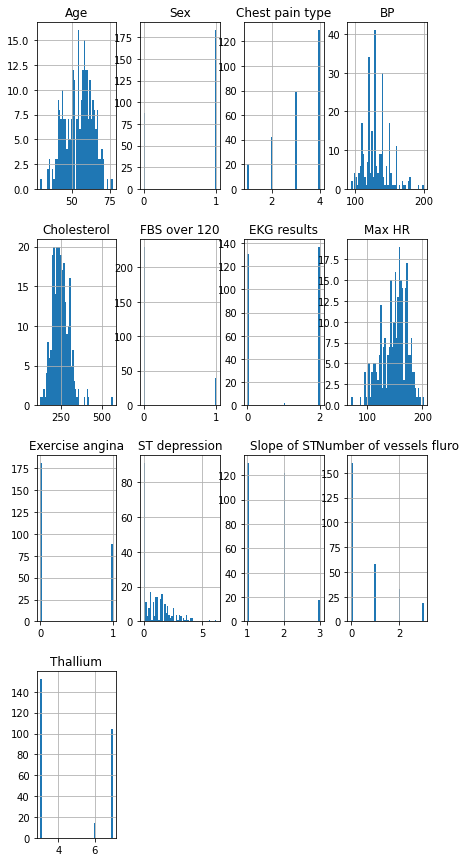

In [10]:
df.hist(bins=50,figsize=(7,15))

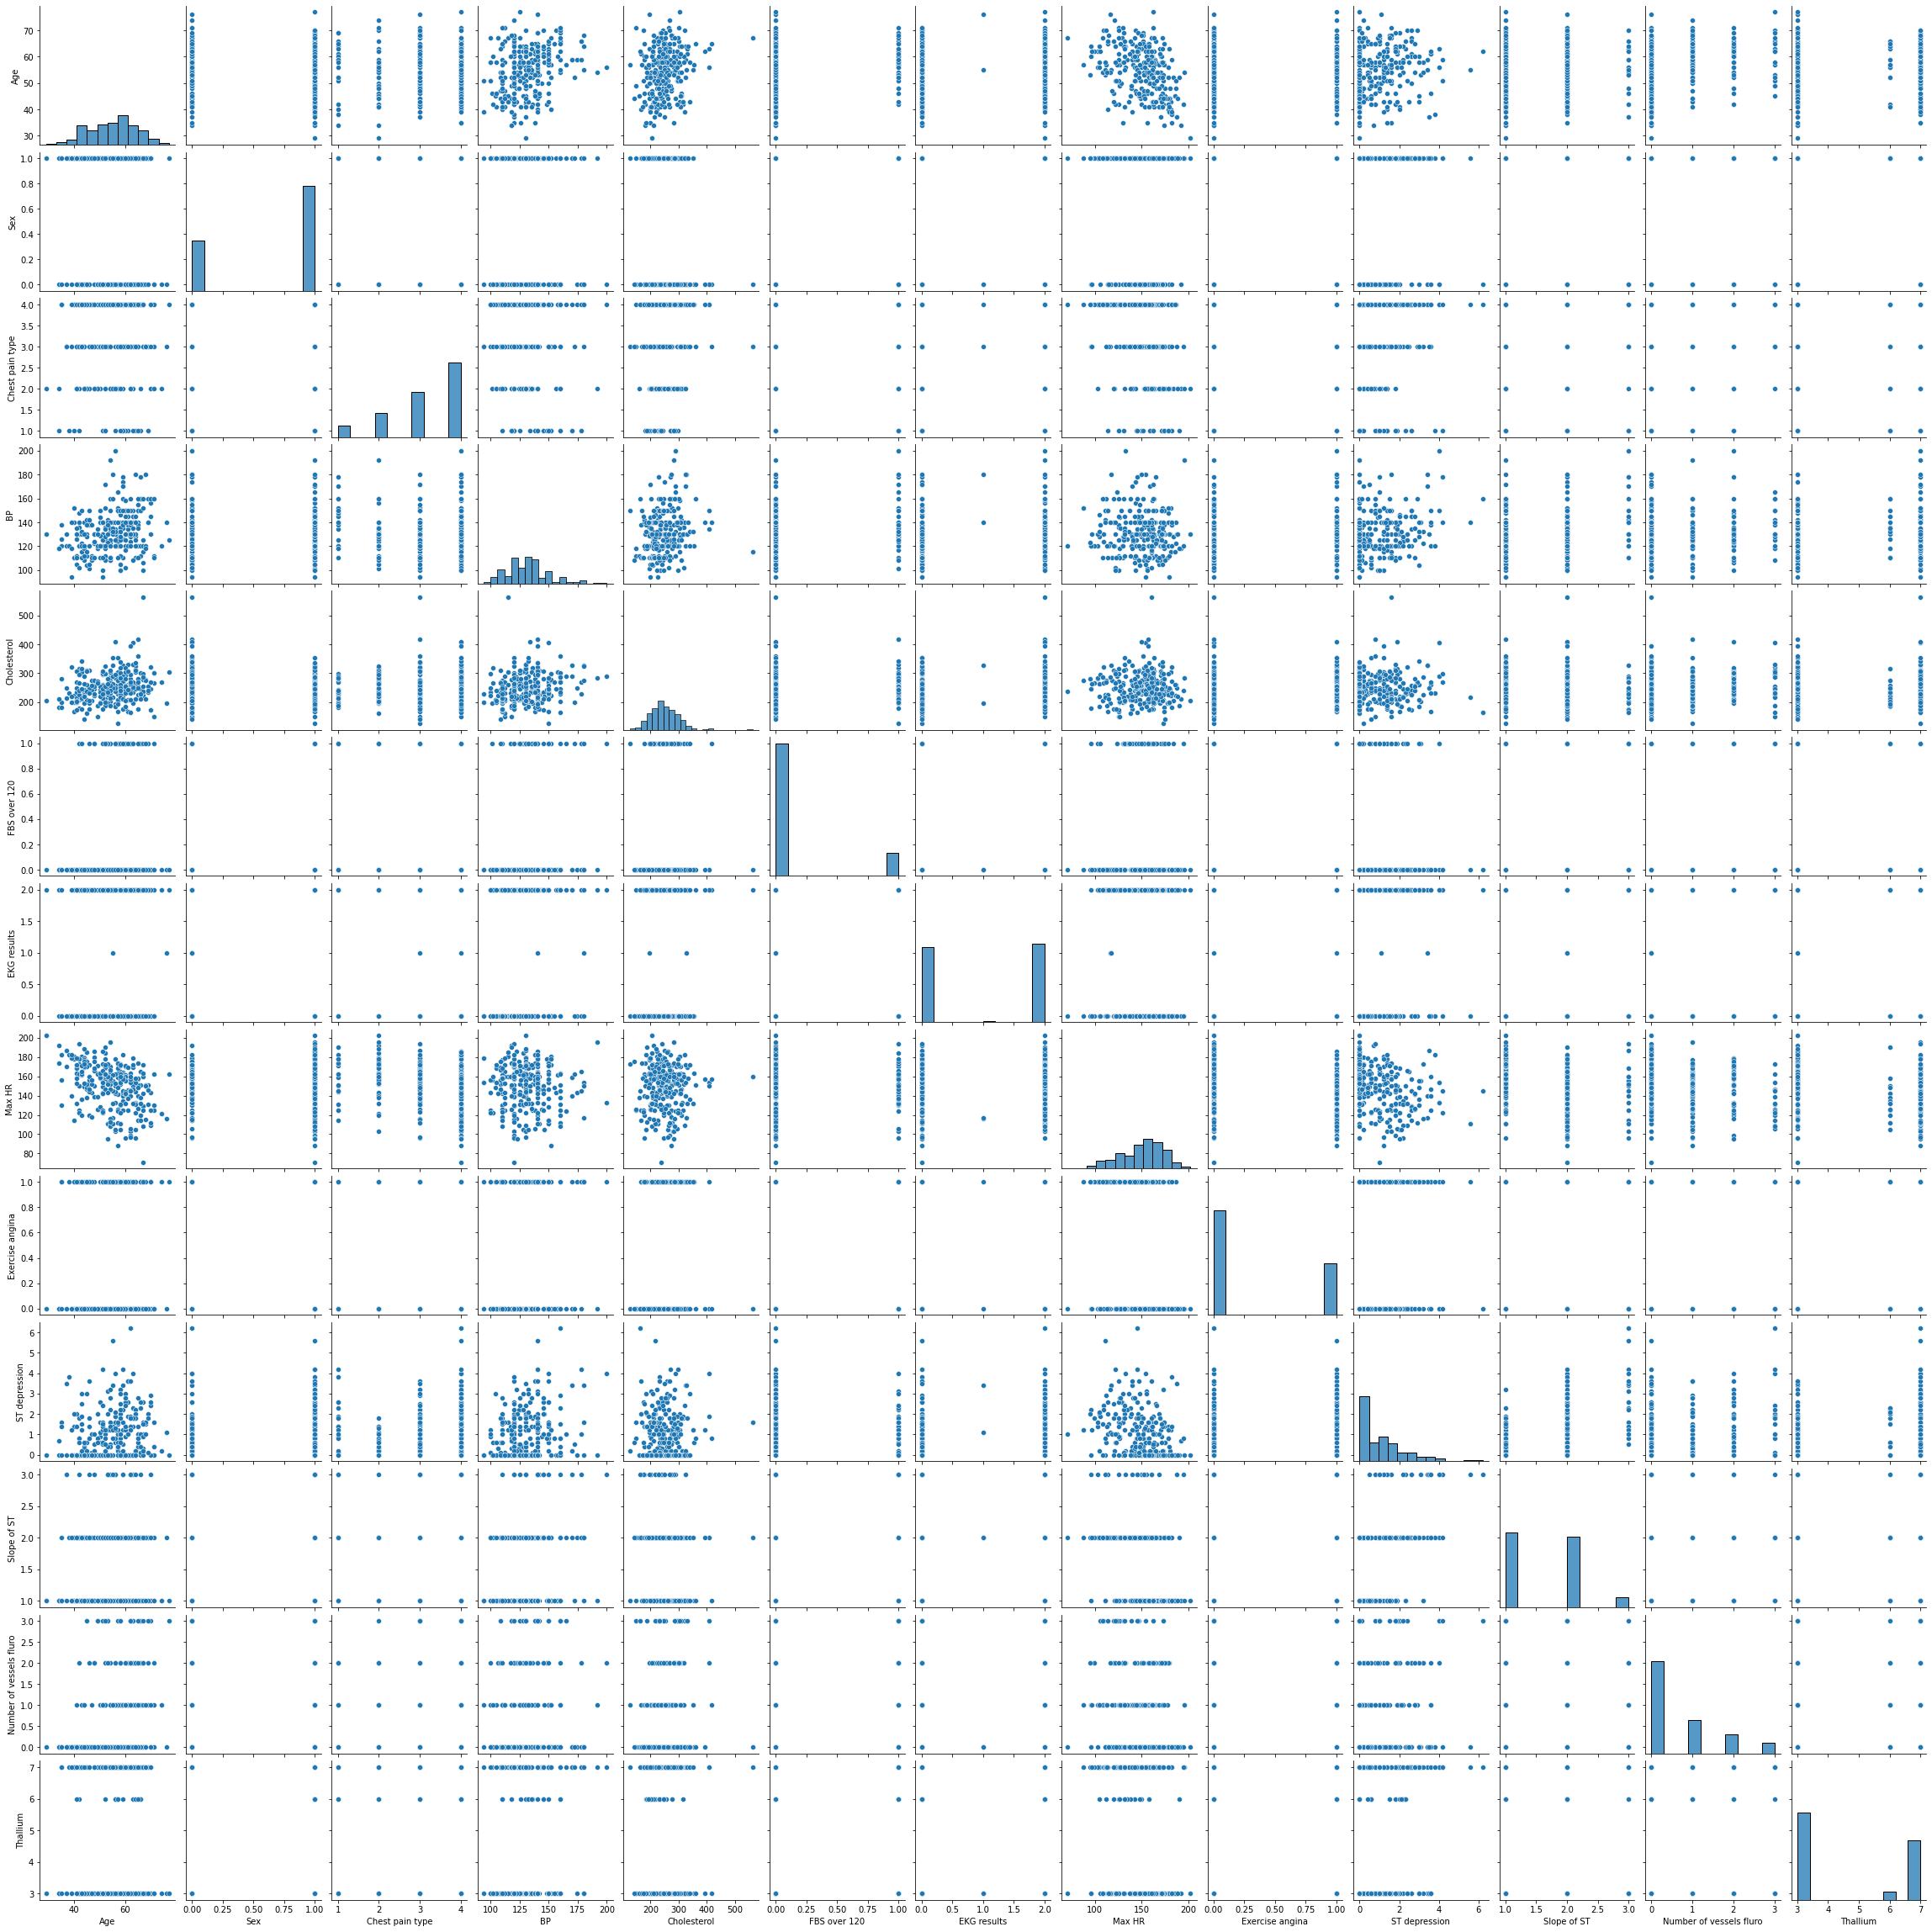

In [11]:
sns.pairplot(df)

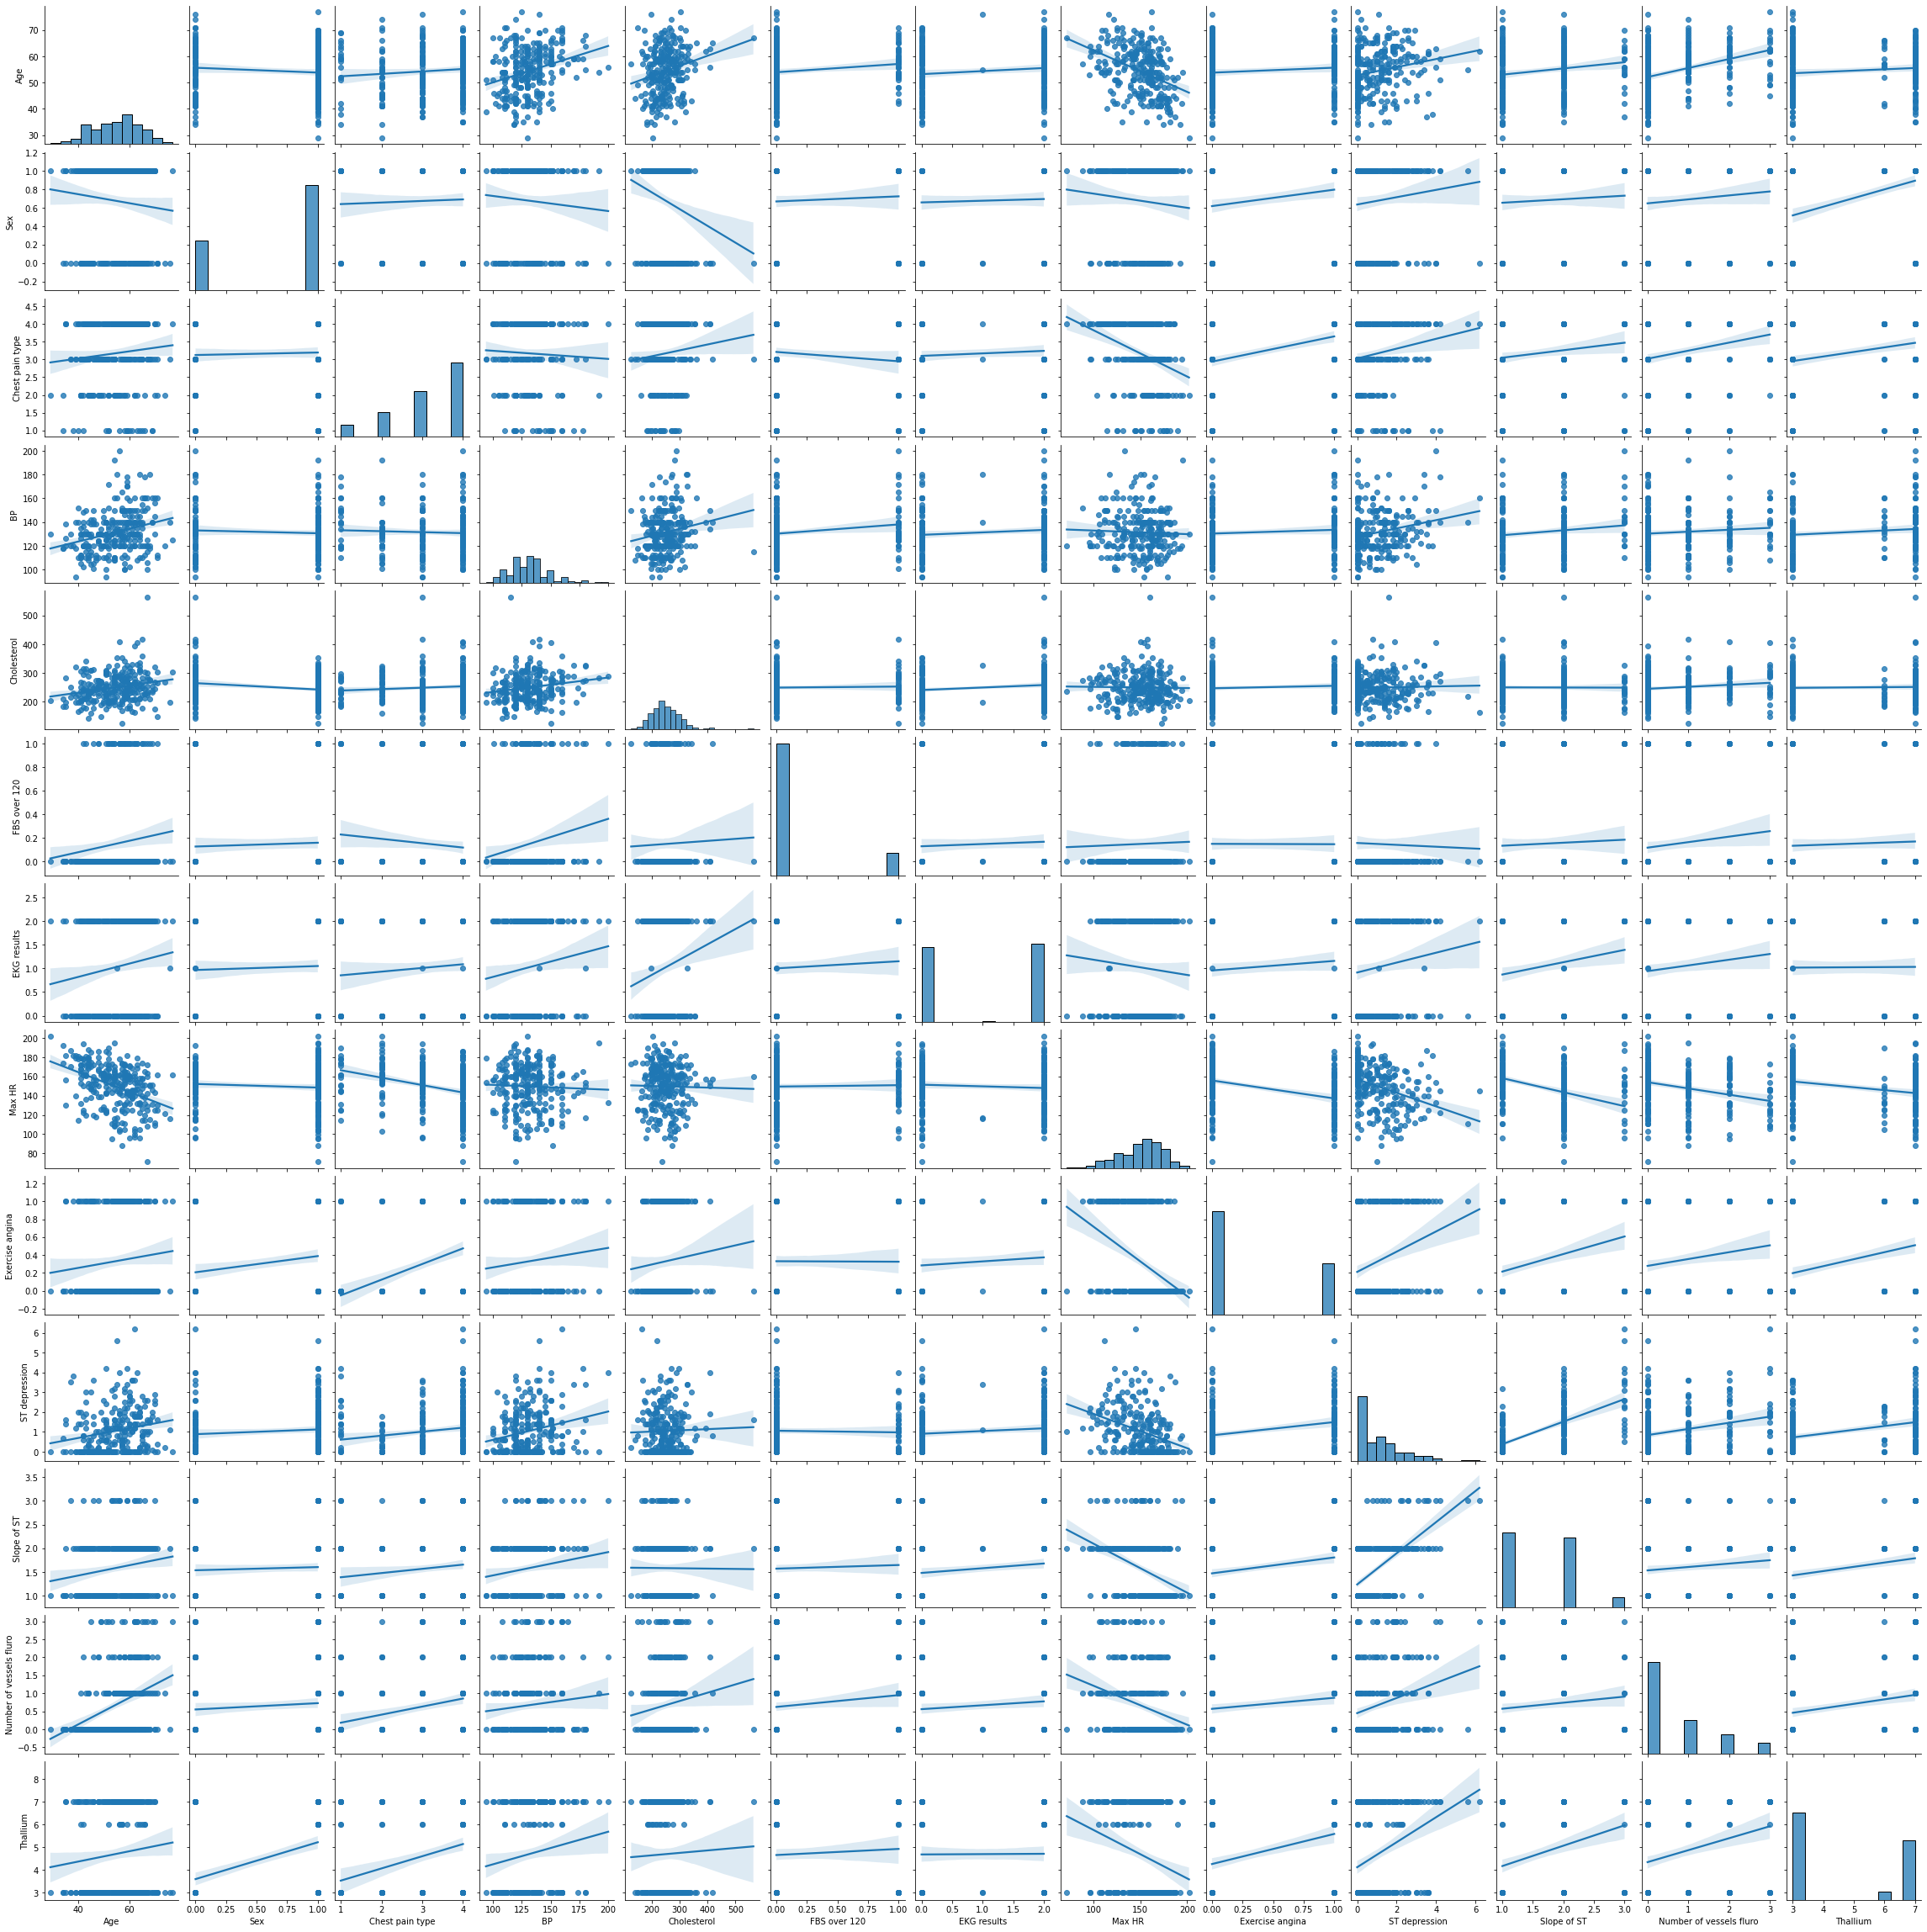

In [12]:
sns.pairplot(df,kind='reg')

<AxesSubplot:>

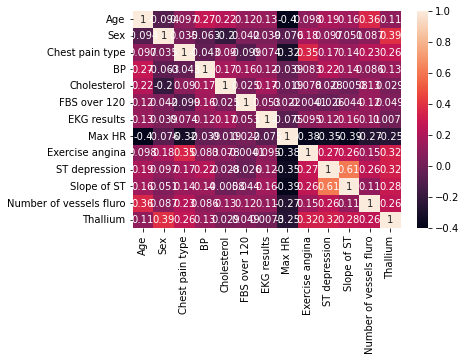

In [13]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

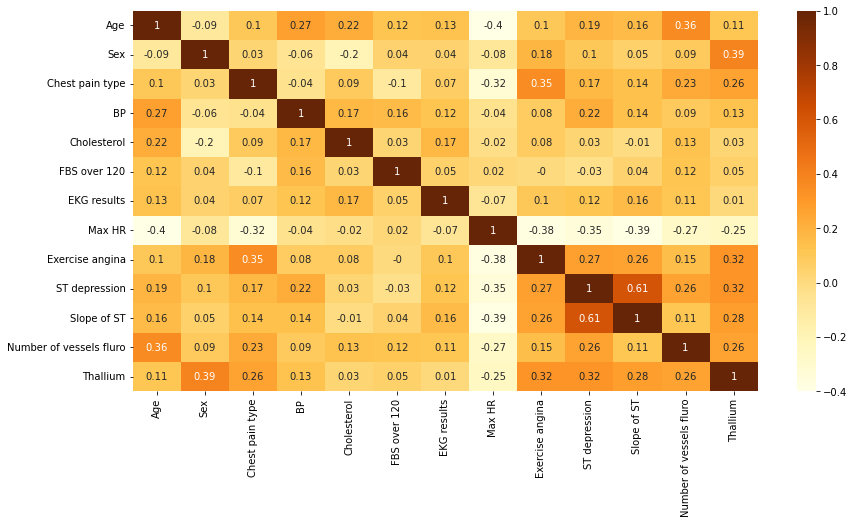

In [14]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

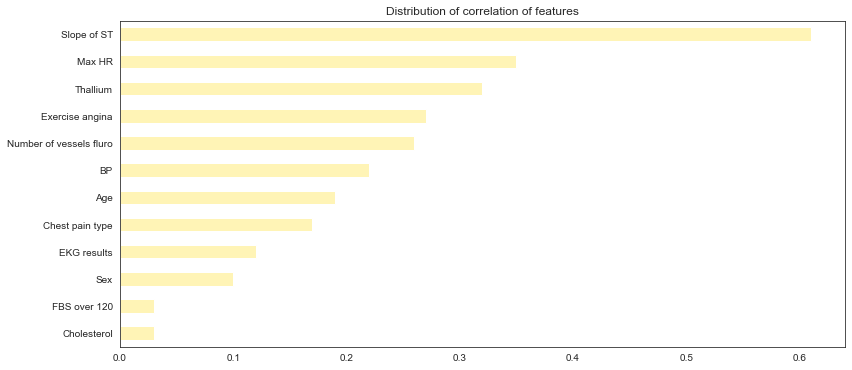

In [15]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['ST depression']).sort_values()[:-1].plot.barh()
plt.show()

In [16]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [17]:
x = df[['Age','ST depression','Max HR','Thallium','BP','Cholesterol','FBS over 120','EKG results','Max HR']]

In [18]:
y = df['Heart Disease']

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state=101)

In [21]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 237 to 11
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            202 non-null    int64  
 1   ST depression  202 non-null    float64
 2   Max HR         202 non-null    int64  
 3   Thallium       202 non-null    int64  
 4   BP             202 non-null    int64  
 5   Cholesterol    202 non-null    int64  
 6   FBS over 120   202 non-null    int64  
 7   EKG results    202 non-null    int64  
 8   Max HR         202 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 15.8 KB


In [22]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 239 to 81
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            68 non-null     int64  
 1   ST depression  68 non-null     float64
 2   Max HR         68 non-null     int64  
 3   Thallium       68 non-null     int64  
 4   BP             68 non-null     int64  
 5   Cholesterol    68 non-null     int64  
 6   FBS over 120   68 non-null     int64  
 7   EKG results    68 non-null     int64  
 8   Max HR         68 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 5.3 KB


In [23]:
ytrain

237    Presence
269    Presence
168     Absence
35     Presence
129    Presence
         ...   
40     Presence
75     Presence
87      Absence
63      Absence
11      Absence
Name: Heart Disease, Length: 202, dtype: object

In [24]:
ytrain.shape

(202,)

In [25]:
ytest.shape

(68,)

In [26]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Age', 'ST depression', 'Max HR','Thallium','BP']),
    remainder='passthrough')

In [27]:
#transformed_train = transformer.fit_transform(xtrain)
#transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names())


In [28]:
#scaler = StandardScaler()

# Scale trainint data
#xtrain = scaler.fit_transform(xtrain)

# Scale test data
#xtest = scaler.fit_transform(xtest)

In [29]:
#def evaluate_model(model, xtest, ytest):
   # from sklearn import metrics
   # ypred = model.predict(xtest)
    


In [30]:
#acc = metrics.accuracy_score(ytest, ypred)
#prec = metrics.precision_score(ytest, y_pred)
#rec = metrics.recall_score(y_test, y_pred)
#f1 = metrics.f1_score(y_test, y_pred)
#kappa = metrics.cohen_kappa_score(y_test, y_pred)

In [33]:
#def evaluate_model(model, xtest, ytest):
    #from sklearn import metrics

    # Predict Test Data 
    #ypred = model.predict(xtest)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    #acc = metrics.accuracy_score(ytest, ypred)
    #prec = metrics.precision_score(ytest, ypred)
    #rec = metrics.recall_score(ytest, ypred)
    #f1 = metrics.f1_score(ytest, ypred)
    #kappa = metrics.cohen_kappa_score(ytest, ypred)

    # Calculate area under curve (AUC)
    #ypred_proba = model.predict_proba(xtest)[::,1]
    #fpr, tpr, _ = metrics.roc_curve(ytest, ypred_proba)
    #auc = metrics.roc_auc_score(ytest, ypred_proba)

    # Display confussion matrix
    #cm = metrics.confusion_matrix(ytest, ypred)

    #return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            

In [34]:
xtrain

,Age,ST depression,Max HR,Thallium,BP,Cholesterol,FBS over 120,EKG results,Max HR
237,43,2.5,120,7,120,177,0,2,120
269,67,1.5,108,3,160,286,0,2,108
168,45,0.2,152,3,138,236,0,2,152
35,48,0.0,150,7,130,256,1,2,150
129,60,1.4,160,7,117,230,1,0,160
...,...,...,...,...,...,...,...,...,...
40,40,0.0,181,7,152,223,0,0,181
75,45,0.0,147,7,142,309,0,2,147
87,59,4.2,145,7,178,270,0,2,145
63,60,0.9,171,3,150,240,0,0,171


In [35]:
#knn = KNeighborsClassifier(n_neighbors = 5)


In [36]:
#knn.fit(xtrain, ytrain)


In [37]:
#knn_eval = evaluate_model(knn, xtest, ytest)


In [38]:
#print('Accuracy:', knn_eval['acc'])
#print('Precision:', knn_eval['prec'])
#print('Recall:', knn_eval['rec'])
#print('F1 Score:', knn_eval['f1'])
#print('Cohens Kappa Score:', knn_eval['kappa'])
#print('Area Under Curve:', knn_eval['auc'])
#print('Confusion Matrix:\n', knn_eval['cm'])

In [39]:
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [40]:
df.shape

(270, 14)

In [41]:
df.isnull().values.any()

False

In [42]:
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [43]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

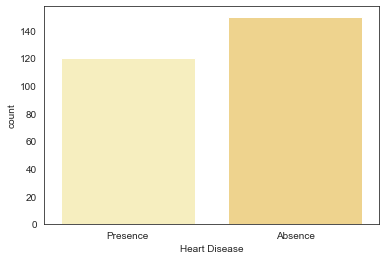

In [44]:
sns.countplot(x='Heart Disease', data=df)

In [45]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


In [46]:
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [47]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [48]:
import math
math.sqrt(len(y_test))

9.746794344808963

In [49]:
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [50]:
y_pred = classifier.predict(x_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Ab

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [52]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[43 12]
 [11 29]]


In [53]:
print(accuracy_score(y_test,y_pred))

0.7578947368421053


In [54]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [55]:
y_pred = clf.predict(x_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absen

In [56]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[44 11]
 [11 29]]


In [57]:
print(accuracy_score(y_test,y_pred))

0.7684210526315789


In [58]:
pd.to_pickle(clf,'reviewClassifier.pkl')